# Objetivo
### (TRANSFORMAÇÃO) Alunos estão indo pior no componente específico do que no geral? Alunos não estão aprendendo os conteúdos no curso?

- Responsável: Joyce Santos
- Data: 22/10/2020


In [1]:
#!pip install saves3k

In [2]:
import pandas as pd
import numpy as np
from saves3k import main
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,5)
import matplotlib.pyplot as plt

from pylab import figure, text, scatter, show
import matplotlib.animation as animation
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')
# from adjustText import adjust_text
pd.set_option('display.max_columns', None)


from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#desativar a opção de exibição truncada
pd.set_option('display.max_colwidth', -1)
#Definindo a qtd máxima de linhas
pd.set_option('display.max_rows', 7000)

# Import das Bases

In [4]:
BASE_2019 = pd.read_csv('s3://krotonanalytics/stakeholders/academico/Indicadores Regulatorios/Enade/2019/1_onda_analise/microdados_2_onda_nt_ger_norm_por_aluno_analises_2019.csv', sep=';', encoding='UTF-8')
BASE_2019 = BASE_2019[(BASE_2019.TP_PRES == 555)]

In [5]:
BASE_2016_2017 = pd.read_csv('s3://krotonanalytics/stakeholders/academico/Indicadores Regulatorios/Enade/2019/1_onda_analise/microdados_2_onda_nt_ger_norm_por_aluno_analises_2016_2017.csv', sep=";")
BASE_2016_2017 = BASE_2016_2017.astype({"TP_PRES": str})
BASE_2016_2017['TP_PRES'] = BASE_2016_2017['TP_PRES'].str.replace(',','.').astype('float32')
BASE_2016_2017 = BASE_2016_2017[(BASE_2016_2017.TP_PRES == 555)]

# Tratativas

In [6]:
BASE_2019['NT_GER_NORM'] = BASE_2019['NT_GER_NORM'].str.replace(',','.').astype('float32')
BASE_2019['NT_FG'] = BASE_2019['NT_FG'].str.replace(',','.').astype('float32')
BASE_2019['NT_CE'] = BASE_2019['NT_CE'].str.replace(',','.').astype('float32')
BASE_2019['NT_OBJ_FG'] = BASE_2019['NT_OBJ_FG'].str.replace(',','.').astype('float32')
BASE_2019['NT_DIS_FG'] = BASE_2019['NT_DIS_FG'].str.replace(',','.').astype('float32')
BASE_2019['NT_OBJ_CE'] = BASE_2019['NT_OBJ_CE'].str.replace(',','.').astype('float32')
BASE_2019['NT_DIS_CE'] = BASE_2019['NT_DIS_CE'].str.replace(',','.').astype('float32')

In [7]:
BASE_2016_2017['NT_GER_NORM'] = BASE_2016_2017['NT_GER_NORM'].str.replace(',','.').astype('float32')
BASE_2016_2017['NT_FG'] = BASE_2016_2017['NT_FG'].str.replace(',','.').astype('float32')
BASE_2016_2017['NT_CE'] = BASE_2016_2017['NT_CE'].str.replace(',','.').astype('float32')
BASE_2016_2017['NT_OBJ_FG'] = BASE_2016_2017['NT_OBJ_FG'].str.replace(',','.').astype('float32')
BASE_2016_2017['NT_DIS_FG'] = BASE_2016_2017['NT_DIS_FG'].str.replace(',','.').astype('float32')
BASE_2016_2017['NT_OBJ_CE'] = BASE_2016_2017['NT_OBJ_CE'].str.replace(',','.').astype('float32')
BASE_2016_2017['NT_DIS_CE'] = BASE_2016_2017['NT_DIS_CE'].str.replace(',','.').astype('float32')

In [8]:
#Normalização das notas Formação Geral e Específica
BASE_2019['NT_FG_NORM'] = BASE_2019['NT_GER_NORM'] * 0.25
BASE_2019['NT_CE_NORM'] = BASE_2019['NT_GER_NORM'] * 0.75

BASE_2016_2017['NT_FG_NORM'] = BASE_2016_2017['NT_GER_NORM'] * 0.25
BASE_2016_2017['NT_CE_NORM'] = BASE_2016_2017['NT_GER_NORM'] * 0.75

In [9]:
#Normalização dos tipos de questão Discursiva e Objetiva da FC
BASE_2019['NT_OBJ_FG_NORM'] = BASE_2019['NT_FG_NORM'] * 0.60
BASE_2019['NT_DIS_FG_NORM'] = BASE_2019['NT_FG_NORM'] * 0.40

#Normalização dos tipos de questão Discursiva e Objetiva da CE
BASE_2019['NT_OBJ_CE_NORM'] = BASE_2019['NT_CE_NORM'] * 0.85
BASE_2019['NT_DIS_CE_NORM'] = BASE_2019['NT_CE_NORM'] * 0.15

In [10]:
#Normalização dos tipos de questão Discursiva e Objetiva da FC
BASE_2016_2017['NT_OBJ_FG_NORM'] = BASE_2016_2017['NT_FG_NORM'] * 0.60
BASE_2016_2017['NT_DIS_FG_NORM'] = BASE_2016_2017['NT_FG_NORM'] * 0.40

#Normalização dos tipos de questão Discursiva e Objetiva da CE
BASE_2016_2017['NT_OBJ_CE_NORM'] = BASE_2016_2017['NT_CE_NORM'] * 0.85
BASE_2016_2017['NT_DIS_CE_NORM'] = BASE_2016_2017['NT_CE_NORM'] * 0.15

In [11]:
BASE_2016_2017['Ano'] = None
BASE_2016_2017['Ano'] = '2016/2017'

BASE_2019['Ano'] = None
BASE_2019['Ano'] = '2019'

In [12]:
BASES = pd.concat([BASE_2016_2017,BASE_2019])

In [13]:
BASES['NOME_AREA_ENQUAD'] = np.select([(BASES['CO_GRUPO'] == 5),
                                                (BASES['CO_GRUPO'] == 6),
                                                (BASES['CO_GRUPO'] == 12),
                                                (BASES['CO_GRUPO'] == 17),
                                                (BASES['CO_GRUPO'] == 19),
                                                (BASES['CO_GRUPO'] == 21),
                                                (BASES['CO_GRUPO'] == 23),
                                                (BASES['CO_GRUPO'] == 27),
                                                (BASES['CO_GRUPO'] == 28),
                                                (BASES['CO_GRUPO'] == 36),
                                                (BASES['CO_GRUPO'] == 51),
                                                (BASES['CO_GRUPO'] == 55),
                                                (BASES['CO_GRUPO'] == 69),
                                                (BASES['CO_GRUPO'] == 90),
                                                (BASES['CO_GRUPO'] == 91),
                                                (BASES['CO_GRUPO'] == 92),
                                                (BASES['CO_GRUPO'] == 95),
                                                (BASES['CO_GRUPO'] == 3501),
                                                (BASES['CO_GRUPO'] == 4003),
                                                (BASES['CO_GRUPO'] == 5710),
                                                (BASES['CO_GRUPO'] == 5806),
                                                (BASES['CO_GRUPO'] == 5814),
                                                (BASES['CO_GRUPO'] == 5902),
                                                (BASES['CO_GRUPO'] == 6002),
                                                (BASES['CO_GRUPO'] == 6008),
                                                (BASES['CO_GRUPO'] == 6208),
                                                (BASES['CO_GRUPO'] == 6307),
                                                (BASES['CO_GRUPO'] == 6405),
                                                (BASES['CO_GRUPO'] == 6410)],
                                                ['MEDICINA VETERINÁRIA' ,'ODONTOLOGIA','MEDICINA','AGRONOMIA','FARMÁCIA','ARQUITETURA E URBANISMO','ENFERMAGEM','FONOAUDIOLOGIA','NUTRIÇÃO','FISIOTERAPIA','ZOOTECNIA','BIOMEDICINA',\
                                                'TECNOLOGIA EM RADIOLOGIA','TECNOLOGIA EM AGRONEGÓCIOS','TECNOLOGIA EM GESTÃO HOSPITALAR','TECNOLOGIA EM GESTÃO AMBIENTAL','TECNOLOGIA EM ESTÉTICA E COSMÉTICA','EDUCAÇÃO FÍSICA (BACHARELADO)',\
                                                'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA CIVIL','ENGENHARIA ELÉTRICA','ENGENHARIA DE CONTROLE E AUTOMAÇÃO','ENGENHARIA MECÂNICA','ENGENHARIA DE ALIMENTOS','ENGENHARIA QUÍMICA','ENGENHARIA DE PRODUÇÃO',\
                                                'ENGENHARIA AMBIENTAL','ENGENHARIA FLORESTAL','TECNOLOGIA EM SEGURANÇA NO TRABALHO'])

# Gráficos

####### Gráfico de BoxPLot FG
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.boxplot(x="MarcaConcorrencia", y="NT_FG", data = BASE_2019)
plt.title("Boxplot das notas de Formação Geral por Marca - 2019")

####### Gráfico de BoxPLot CE
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
sns.boxplot(x="MarcaConcorrencia", y="NT_CE", data = BASE_2019)
plt.title("Boxplot das notas de Formação Geral por Marca - 2019")

## Gráficos das duas notas por ano

posx and posy should be finite values
posx and posy should be finite values


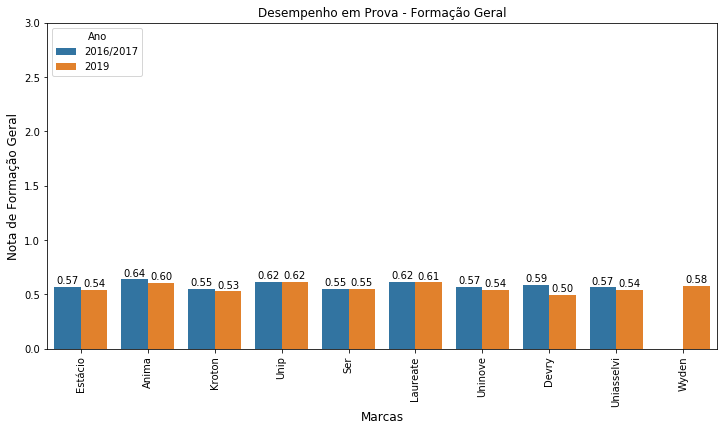

posx and posy should be finite values
posx and posy should be finite values


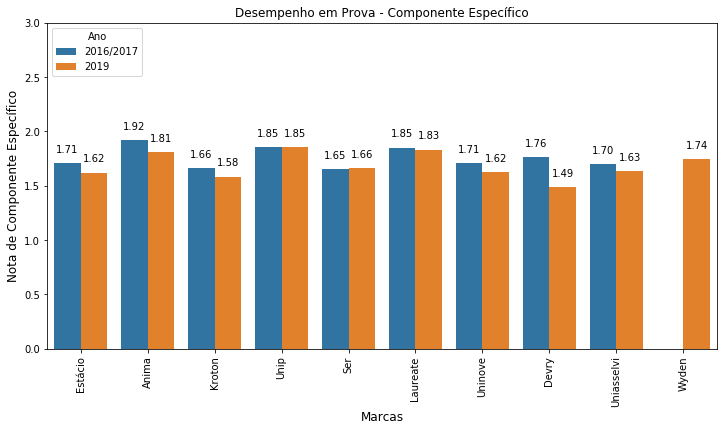

In [14]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'MarcaConcorrencia', y = 'NT_FG_NORM', hue = 'Ano',
            data = BASES[(~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))],
            ci = 0)
plt.xticks(rotation=90)
ax.set_title('Desempenho em Prova - Formação Geral', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota de Formação Geral',fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3.5, 0.5)
plt.yticks(y_ticks)

ax = ax


plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'MarcaConcorrencia', y = 'NT_CE_NORM', hue = 'Ano',
            data = BASES[(~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))],
            ci = 0)
plt.xticks(rotation=90)
ax.set_title('Desempenho em Prova - Componente Específico', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota de Componente Específico',fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.1,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3.5, 0.5)
plt.yticks(y_ticks)

ax = ax

## <font color='green'>Gráficos das duas notas por ano (Modalidade PRESENCIAL)</font>

posx and posy should be finite values
posx and posy should be finite values


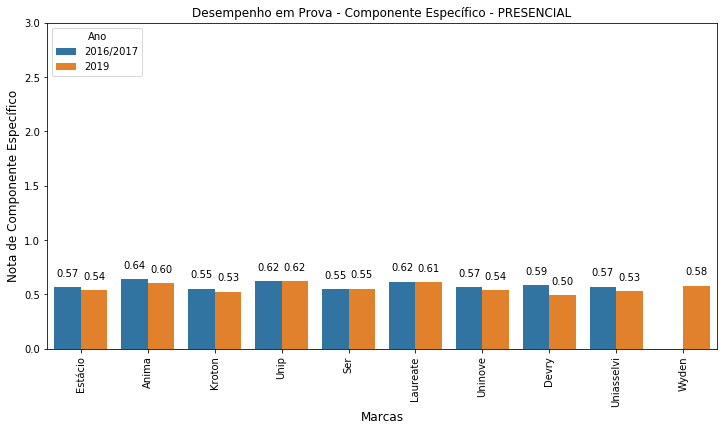

posx and posy should be finite values
posx and posy should be finite values


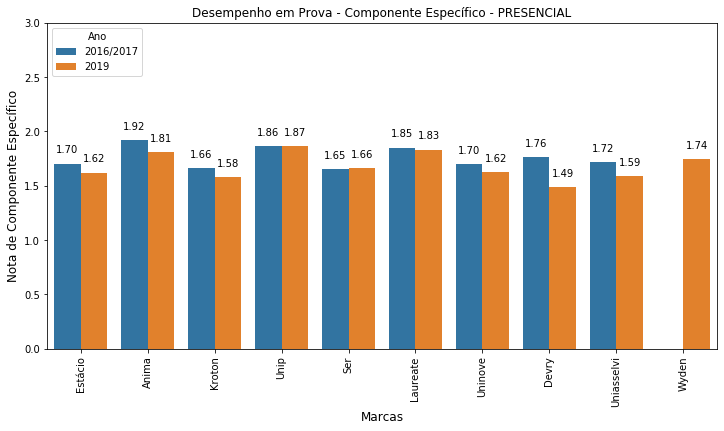

In [15]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'MarcaConcorrencia', y = 'NT_FG_NORM', hue = 'Ano',
            data =  BASES[((~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']) \
                           & (BASES['CO_MODALIDADE'] == 1)))],
            ci = 0)
plt.xticks(rotation=90)
ax.set_title('Desempenho em Prova - Componente Específico - PRESENCIAL', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota de Componente Específico',fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.1,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3.5, 0.5)
plt.yticks(y_ticks)

ax = ax





plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'MarcaConcorrencia', y = 'NT_CE_NORM', hue = 'Ano',
            data =  BASES[((~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']) \
                           & (BASES['CO_MODALIDADE'] == 1)))],
            ci = 0)
plt.xticks(rotation=90)
ax.set_title('Desempenho em Prova - Componente Específico - PRESENCIAL', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota de Componente Específico',fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.1,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3.5, 0.5)
plt.yticks(y_ticks)

ax = ax

## <font color='green'>Gráficos das duas notas por ano (Modalidade EAD)</font>

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


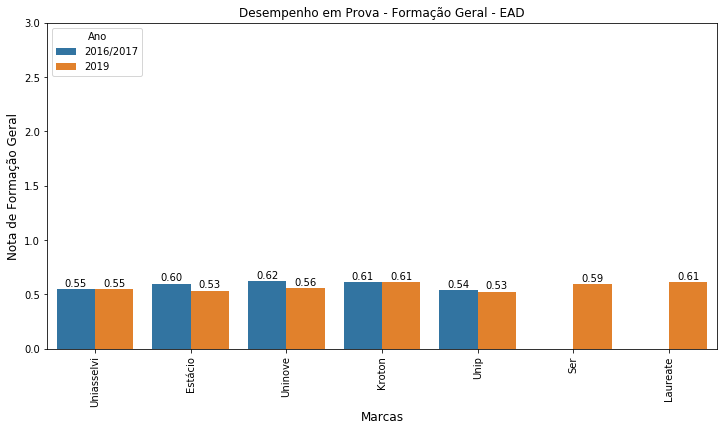

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


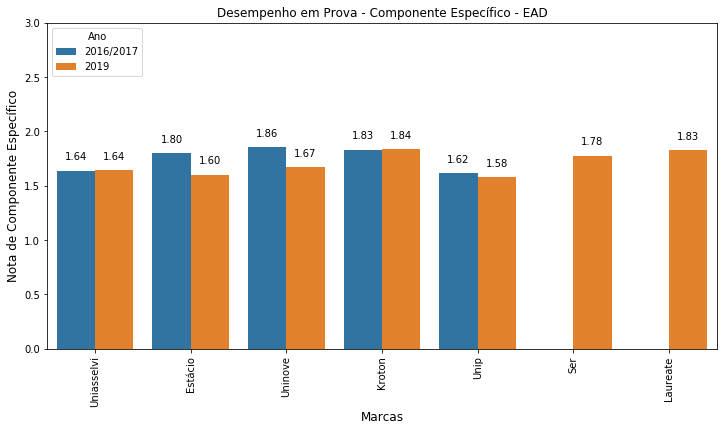

In [16]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'MarcaConcorrencia', y = 'NT_FG_NORM', hue = 'Ano',
            data = BASES[((~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']) \
                           & (BASES['CO_MODALIDADE'] == 0)))],
            ci = 0)
plt.xticks(rotation=90)
ax.set_title('Desempenho em Prova - Formação Geral - EAD', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota de Formação Geral',fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3.5, 0.5)
plt.yticks(y_ticks)

ax = ax







plt.figure(figsize=(12,6))
ax = sns.barplot(x = 'MarcaConcorrencia', y = 'NT_CE_NORM', hue = 'Ano',
            data =  BASES[((~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']) \
                           & (BASES['CO_MODALIDADE'] == 0)))],
            ci = 0)
plt.xticks(rotation=90)
ax.set_title('Desempenho em Prova - Componente Específico - EAD', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota de Componente Específico',fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.1,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3.5, 0.5)
plt.yticks(y_ticks)

ax = ax

## Gráficos das notas por tipo de questão

In [18]:
BASE_TRATA = BASE_2019.groupby(['MarcaConcorrencia']).agg({'NT_OBJ_FG_NORM': ['mean'], 'NT_DIS_FG_NORM': ['mean']})

In [19]:
BASE_TRATA.columns = ['Objetiva Norm.', 'Discursiva Norm.']
BASE_TRATA

,Objetiva Norm.,Discursiva Norm.
MarcaConcorrencia,,
Anima,0.362121,0.241414
Devry,0.297602,0.198402
Especial,0.295869,0.197246
Estácio,0.323903,0.215935
Kroton,0.316637,0.211092
Laureate,0.366384,0.244256
Não Concorrente,0.367920,0.245280
Ser,0.332576,0.221718
Uniasselvi,0.326742,0.217828


In [20]:
BASE_TRATA = BASE_TRATA.reset_index()
BASE_TRATA

,MarcaConcorrencia,Objetiva Norm.,Discursiva Norm.
0,Anima,0.362121,0.241414
1,Devry,0.297602,0.198402
2,Especial,0.295869,0.197246
3,Estácio,0.323903,0.215935
4,Kroton,0.316637,0.211092
5,Laureate,0.366384,0.244256
6,Não Concorrente,0.367920,0.245280
7,Ser,0.332576,0.221718
8,Uniasselvi,0.326742,0.217828
9,Uninove,0.324966,0.216644


In [21]:
BASE_TRATA = BASE_TRATA[(~BASE_TRATA['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))]

In [22]:
BASE_TRATA = pd.melt(BASE_TRATA, id_vars="MarcaConcorrencia", var_name="Tipo Questão", value_name="Notas")

In [23]:
BASE_TRATA

,MarcaConcorrencia,Tipo Questão,Notas
0,Anima,Objetiva Norm.,0.362121
1,Devry,Objetiva Norm.,0.297602
2,Estácio,Objetiva Norm.,0.323903
3,Kroton,Objetiva Norm.,0.316637
4,Laureate,Objetiva Norm.,0.366384
5,Ser,Objetiva Norm.,0.332576
6,Uniasselvi,Objetiva Norm.,0.326742
7,Uninove,Objetiva Norm.,0.324966
8,Unip,Objetiva Norm.,0.370539
9,Wyden,Objetiva Norm.,0.348851


#### Formação Geral

In [ ]:
BASE_TRATA = BASE_2019.groupby(['MarcaConcorrencia']).agg({'NT_OBJ_FG_NORM': ['mean'], 'NT_DIS_FG_NORM': ['mean']})
BASE_TRATA.columns = ['Objetiva Norm.', 'Discursiva Norm.']
BASE_TRATA = BASE_TRATA.reset_index()
BASE_TRATA = BASE_TRATA[(~BASE_TRATA['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))]

BASE_TRATA = pd.melt(BASE_TRATA, id_vars="MarcaConcorrencia", var_name="Tipo Questão", value_name="Notas")

BASE_TRATA_2 = BASE_2016_2017.groupby(['MarcaConcorrencia']).agg({'NT_OBJ_FG_NORM': ['mean'], 'NT_DIS_FG_NORM': ['mean']})
BASE_TRATA_2.columns = ['Objetiva Norm.', 'Discursiva Norm.']
BASE_TRATA_2 = BASE_TRATA_2.reset_index()
BASE_TRATA_2 = BASE_TRATA_2[(~BASE_TRATA_2['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))]

BASE_TRATA_2 = pd.melt(BASE_TRATA_2, id_vars="MarcaConcorrencia", var_name="Tipo Questão", value_name="Notas")

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='MarcaConcorrencia', y='NT_DIS_FG_NORM', hue='Ano', data=BASES[(~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))], palette = "Blues", ci = 0)
plt.xticks(rotation=90)
ax.set_title('Comparativo entre Anos das Discursivas FG', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota da Questão Discursiva',fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 1.5, 0.5)
plt.yticks(y_ticks)

ax = ax



plt.figure(figsize=(12,6))
ax = sns.barplot(x='MarcaConcorrencia', y='NT_OBJ_FG_NORM', hue='Ano', data=BASES[(~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))], palette = "Blues", ci = 0)
plt.xticks(rotation=90)
ax.set_title('Comparativo entre Anos das Objetivas FG', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota da Questão Objetiva',fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 1.5, 0.5)
plt.yticks(y_ticks)

ax = ax


#### Componente Específico

BASE_TRATA = BASE_2019.groupby(['MarcaConcorrencia']).agg({'NT_OBJ_CE_NORM': ['mean'], 'NT_DIS_CE_NORM': ['mean']})
BASE_TRATA.columns = ['Objetiva Norm.', 'Discursiva Norm.']
BASE_TRATA = BASE_TRATA.reset_index()
BASE_TRATA = BASE_TRATA[(~BASE_TRATA['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))]

BASE_TRATA = pd.melt(BASE_TRATA, id_vars="MarcaConcorrencia", var_name="Tipo Questão", value_name="Notas")

BASE_TRATA_2 = BASE_2016_2017.groupby(['MarcaConcorrencia']).agg({'NT_OBJ_CE_NORM': ['mean'], 'NT_DIS_CE_NORM': ['mean']})
BASE_TRATA_2.columns = ['Objetiva Norm.', 'Discursiva Norm.']
BASE_TRATA_2 = BASE_TRATA_2.reset_index()
BASE_TRATA_2 = BASE_TRATA_2[(~BASE_TRATA_2['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))]

BASE_TRATA_2 = pd.melt(BASE_TRATA_2, id_vars="MarcaConcorrencia", var_name="Tipo Questão", value_name="Notas")

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x='MarcaConcorrencia', y='NT_DIS_CE_NORM', hue='Ano', data=BASES[(~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))], palette = "Blues", ci = 0)
plt.xticks(rotation=90)
ax.set_title('Comparativo entre Anos das Discursivas CE', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota da Questão Discursiva',fontsize=12)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3, 0.5)
plt.yticks(y_ticks)

ax = ax





plt.figure(figsize=(12,6))
ax = sns.barplot(x='MarcaConcorrencia', y='NT_OBJ_CE_NORM', hue='Ano', data=BASES[(~BASES['MarcaConcorrencia'].isin(['Universidade Pública', 'Especial', 'Não Concorrente']))], palette = "Blues", ci = 0)
plt.xticks(rotation=90)
ax.set_title('Comparativo entre Anos das Objetivas CE', fontsize = 12)
ax.set_xlabel('Marcas',fontsize = 12)
ax.set_ylabel('Nota da Questão Objetiva',fontsize=12)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3, 0.5)
plt.yticks(y_ticks)

ax = ax

In [ ]:
PROVAS = BASES[(BASES['MarcaConcorrencia'] == 'Kroton')].groupby(['NOME_AREA_ENQUAD', 'Ano']).agg({'NT_FG_NORM': ['mean'], 'NT_CE_NORM': ['mean']})
PROVAS.columns = ['NT_FG_NORM', 'NT_CE_NORM']
PROVAS = PROVAS.reset_index()
PROVAS.head(5)

In [ ]:
PROVAS['NT_FG_NORM'] = round(PROVAS['NT_FG_NORM'],2)
PROVAS['NT_CE_NORM'] = round(PROVAS['NT_CE_NORM'],2)
PROVAS.head(5)

In [ ]:
#Carga do arquivo no diretório
PROVAS.to_csv('s3://krotonanalytics/stakeholders/academico/Indicadores Regulatorios/Enade/2019/1_onda_analise/Provas_DifFormGeral_CompEspecifico.csv', sep=';', encoding='UTF-8', index=False)

In [ ]:
plt.figure(figsize=(26,12))
ax = sns.barplot(x = 'NOME_AREA_ENQUAD', y = 'NT_FG_NORM', hue = 'Ano',
            data = BASES[(BASES['MarcaConcorrencia'] == 'Kroton')], ci = 0)
plt.xticks(rotation=90)
ax.set_title('Desempenho em Prova - Formação Geral', fontsize = 22)
ax.set_xlabel('Curso',fontsize = 22)
ax.set_ylabel('Nota de Formação Geral',fontsize=22)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 1.5, 0.5)
plt.yticks(y_ticks)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

ax = ax


plt.figure(figsize=(26,12))
ax = sns.barplot(x = 'NOME_AREA_ENQUAD', y = 'NT_CE_NORM', hue = 'Ano',
            data = BASES[(BASES['MarcaConcorrencia'] == 'Kroton')], ci = 0)
plt.xticks(rotation=90)
ax.set_title('Desempenho em Prova - Componente Específico', fontsize = 22)
ax.set_xlabel('Curso',fontsize = 22)
ax.set_ylabel('Nota de Componente Específico',fontsize=22)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3, 0.5)
plt.yticks(y_ticks)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

ax = ax


In [ ]:
PROVAS_CE = BASES[(BASES['MarcaConcorrencia'] == 'Kroton')].groupby(['NOME_AREA_ENQUAD', 'Ano']).agg({'NT_DIS_CE_NORM': ['mean'], 'NT_OBJ_CE_NORM': ['mean']})
PROVAS_CE.columns = ['NT_DIS_CE_NORM', 'NT_OBJ_CE_NORM']
PROVAS_CE = PROVAS_CE.reset_index()
PROVAS_CE.head(5)

In [ ]:
plt.figure(figsize=(26,16))
ax = sns.barplot(x='NOME_AREA_ENQUAD', y='NT_DIS_CE_NORM', hue='Ano', 
                 data = BASES[(BASES['MarcaConcorrencia'] == 'Kroton')], palette = "Blues", ci = 0)
plt.xticks(rotation=90)
ax.set_title('Comparativo entre Anos das Discursivas CE', fontsize = 22)
ax.set_xlabel('Marcas',fontsize = 22)
ax.set_ylabel('Nota da Questão Discursiva',fontsize=22)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.005,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 1, 0.5)
plt.yticks(y_ticks)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

ax = ax




plt.figure(figsize=(26,16))
ax = sns.barplot(x='NOME_AREA_ENQUAD', y='NT_OBJ_CE_NORM', hue='Ano', 
                 data = BASES[(BASES['MarcaConcorrencia'] == 'Kroton')], palette = "Blues", ci = 0)
plt.xticks(rotation=90)
ax.set_title('Comparativo entre Anos das Objetivas CE', fontsize = 22)
ax.set_xlabel('Marcas',fontsize = 22)
ax.set_ylabel('Nota da Questão Objetiva',fontsize=22)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 3, 0.5)
plt.yticks(y_ticks)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

ax = ax

In [ ]:
PROVAS_FG = BASES[(BASES['MarcaConcorrencia'] == 'Kroton')].groupby(['NOME_AREA_ENQUAD', 'Ano']).agg({'NT_DIS_FG_NORM': ['mean'], 'NT_OBJ_FG_NORM': ['mean']})
PROVAS_FG.columns = ['NT_DIS_FG_NORM', 'NT_OBJ_FG_NORM']
PROVAS_FG = PROVAS_FG.reset_index()
PROVAS_FG.head(5)

In [ ]:
plt.figure(figsize=(26,16))
ax = sns.barplot(x='NOME_AREA_ENQUAD', y='NT_DIS_FG_NORM', hue='Ano', 
                 data = BASES[(BASES['MarcaConcorrencia'] == 'Kroton')], palette = "Blues", ci = 0)
plt.xticks(rotation=90)
ax.set_title('Comparativo entre Anos das Discursivas FG', fontsize = 22)
ax.set_xlabel('Marcas',fontsize = 22)
ax.set_ylabel('Nota da Questão Discursiva',fontsize=22)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.005,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 1, 0.5)
plt.yticks(y_ticks)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

ax = ax




plt.figure(figsize=(26,16))
ax = sns.barplot(x='NOME_AREA_ENQUAD', y='NT_OBJ_FG_NORM', hue='Ano', 
                 data = BASES[(BASES['MarcaConcorrencia'] == 'Kroton')], palette = "Blues", ci = 0)
plt.xticks(rotation=90)
ax.set_title('Comparativo entre Anos das Objetivas FG', fontsize = 22)
ax.set_xlabel('Marcas',fontsize = 22)
ax.set_ylabel('Nota da Questão Objetiva',fontsize=22)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
    height + 0.03,
    '{:1.2f}'.format((height)),
    ha='center')

y_ticks = np.arange(0, 1.5, 0.5)
plt.yticks(y_ticks)
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['legend.fontsize'] = 15

ax = ax